In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gafa-stock-prices/YahooFinance - GAFA stock prices.csv


Let's learn together and if you find this kernel useful, don't forget to **UPVOTE** for this notebook. Thank you.:D

# 1. The stock price overtime

We will breakdown the stock-price data using pandas and let's see the change of price of stock overtime.

In [2]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
data_df=pd.read_csv("/kaggle/input/gafa-stock-prices/YahooFinance - GAFA stock prices.csv")
data_df.head()

,security_symbol,date,open,high,low,close,adjusted_close,volume
0,%5EGSPC,1980-12-12,127.36,129.98,127.15,129.23,129.23,39530000
1,%5EGSPC,1980-12-15,129.23,131.33,128.64,129.45,129.45,39700000
2,%5EGSPC,1980-12-16,129.45,131.22,128.33,130.60,130.60,41630000
3,%5EGSPC,1980-12-17,130.60,133.59,130.22,132.89,132.89,50800000
4,%5EGSPC,1980-12-18,132.89,135.90,131.89,133.00,133.00,69570000


In [3]:
data_df['security_symbol'].unique()

array(['%5EGSPC', 'GOOG', 'AMZN', 'FB', 'AAPL'], dtype=object)

In [4]:
data_df['security_symbol']=data_df['security_symbol'].replace(['%5EGSPC'],'YHOO')

In [5]:
data_df.head()

,security_symbol,date,open,high,low,close,adjusted_close,volume
0,YHOO,1980-12-12,127.36,129.98,127.15,129.23,129.23,39530000
1,YHOO,1980-12-15,129.23,131.33,128.64,129.45,129.45,39700000
2,YHOO,1980-12-16,129.45,131.22,128.33,130.60,130.60,41630000
3,YHOO,1980-12-17,130.60,133.59,130.22,132.89,132.89,50800000
4,YHOO,1980-12-18,132.89,135.90,131.89,133.00,133.00,69570000


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 8 Text major ticklabel objects>)

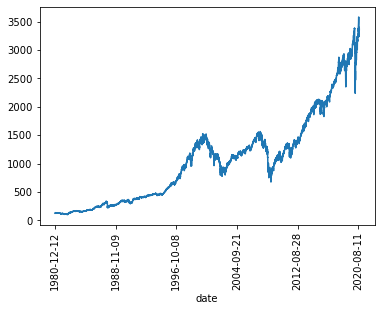

In [6]:
yhoo=data_df[data_df['security_symbol']=='YHOO']
yhoo=yhoo.set_index('date')
#yhoo_close=yhoo.close.values.astype('float32')
#yhoo_close.shape
ax=yhoo['close'].plot()
plt.xticks(rotation=90)

,security_symbol,open,high,low,close,adjusted_close,volume
date,,,,,,,
2019-10-28,YHOO,3032.12,3044.08,3032.12,3039.42,3039.42,3521230000
2019-10-29,YHOO,3035.39,3047.87,3034.81,3036.89,3036.89,3589930000
2019-10-30,YHOO,3039.74,3050.10,3025.96,3046.77,3046.77,3776030000
2019-10-31,YHOO,3046.90,3046.90,3023.19,3037.56,3037.56,4139280000
2019-11-01,YHOO,3050.72,3066.95,3050.72,3066.91,3066.91,3930200000


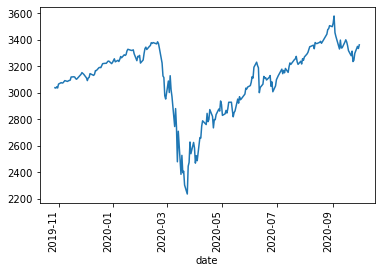

In [7]:
from dateutil import parser
past = datetime.now() - timedelta(days=365)
#new_date = parser.parse("2018-11-10 10:55:31+00:00")
new_date = datetime.now()

    
data_df['date'] = pd.to_datetime(data_df['date'])  
    
#greater than the start date and smaller than the end date
mask = (data_df['date'] < new_date) & (data_df['date'] > past)

# On Covid-19 Pandemic
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
yhoo=data_df[data_df['security_symbol']=='YHOO']
yhoo=yhoo.loc[mask]
yhoo=yhoo.set_index('date')

yhoo_close=yhoo.close.values.astype('float32')
#yhoo_close.shape
#ax=yhoo['close'].plot('r+')
ax=yhoo['close'].plot()
plt.xticks(rotation=90)
yhoo.head()

#plt.scatter(yhoo.index, yhoo['close'])

(array([730851., 731581., 732312., 733042., 733773., 734503., 735234.,
        735964., 736695., 737425., 738156.]),
 <a list of 11 Text major ticklabel objects>)

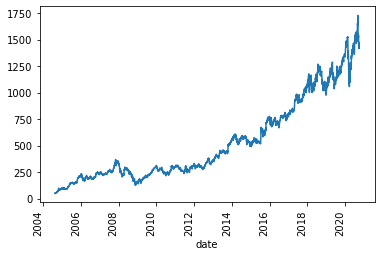

In [8]:
goog=data_df[data_df['security_symbol']=='GOOG']
goog=goog.set_index('date')
#yhoo_close=yhoo.close.values.astype('float32')
#yhoo_close.shape
ax=goog['close'].plot()
plt.xticks(rotation=90)

,security_symbol,open,high,low,close,adjusted_close,volume
date,,,,,,,
2019-10-28,GOOG,1275.45,1299.31,1272.54,1290.00,1290.00,2613200
2019-10-29,GOOG,1276.23,1281.59,1257.21,1262.62,1262.62,1886400
2019-10-30,GOOG,1252.97,1269.36,1252.00,1261.29,1261.29,1408900
2019-10-31,GOOG,1261.28,1267.67,1250.84,1260.11,1260.11,1455700
2019-11-01,GOOG,1265.00,1274.62,1260.50,1273.74,1273.74,1670100


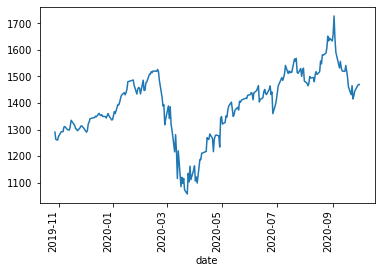

In [9]:
data_df['date'] = pd.to_datetime(data_df['date'])  
    
#greater than the start date and smaller than the end date
mask = (data_df['date'] < new_date) & (data_df['date'] > past)

# On Covid-19 Pandemic
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
goog=data_df[data_df['security_symbol']=='GOOG']
goog=goog.loc[mask]
goog=goog.set_index('date')

#yhoo_close=yhoo.close.values.astype('float32')
#yhoo_close.shape
#ax=yhoo['close'].plot('r+')
ax=goog['close'].plot()
plt.xticks(rotation=90)
goog.head()

#plt.scatter(yhoo.index, yhoo['close'])

(array([734138., 734503., 734869., 735234., 735599., 735964., 736330.,
        736695., 737060., 737425., 737791.]),
 <a list of 11 Text major ticklabel objects>)

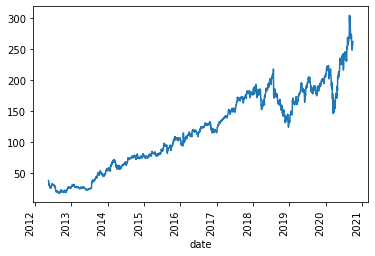

In [10]:
fb=data_df[data_df['security_symbol']=='FB']
fb=fb.set_index('date')
ax=fb['close'].plot()
plt.xticks(rotation=90)

,security_symbol,open,high,low,close,adjusted_close,volume
date,,,,,,,
2019-10-28,FB,187.20,189.53,185.08,189.40,189.40,13657900
2019-10-29,FB,191.69,192.53,188.47,189.31,189.31,13574900
2019-10-30,FB,189.56,190.45,185.98,188.25,188.25,28734600
2019-10-31,FB,196.70,198.09,188.25,191.65,191.65,42286500
2019-11-01,FB,192.85,194.11,189.91,193.62,193.62,21711800


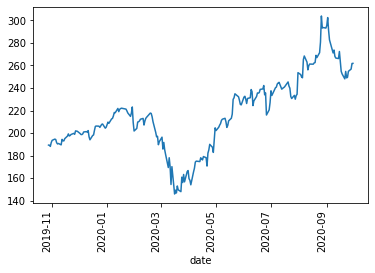

In [11]:
data_df['date'] = pd.to_datetime(data_df['date'])  
    
#greater than the start date and smaller than the end date
mask = (data_df['date'] < new_date) & (data_df['date'] > past)

# On Covid-19 Pandemic
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
fb=data_df[data_df['security_symbol']=='FB']
fb=fb.loc[mask]
fb=fb.set_index('date')

#yhoo_close=yhoo.close.values.astype('float32')
#yhoo_close.shape
#ax=yhoo['close'].plot('r+')
ax=fb['close'].plot()
plt.xticks(rotation=90)
fb.head()

#plt.scatter(yhoo.index, yhoo['close'])

(array([728659., 730120., 731581., 733042., 734503., 735964., 737425.,
        738886.]),
 <a list of 8 Text major ticklabel objects>)

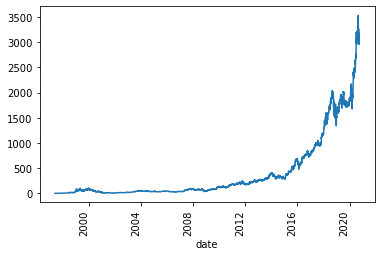

In [12]:
amzn=data_df[data_df['security_symbol']=='AMZN']
amzn=amzn.set_index('date')
ax=amzn['close'].plot()
plt.xticks(rotation=90)

,security_symbol,open,high,low,close,adjusted_close,volume
date,,,,,,,
2019-10-28,AMZN,1748.06,1778.70,1742.50,1777.08,1777.08,3708900
2019-10-29,AMZN,1774.81,1777.00,1755.81,1762.71,1762.71,2276900
2019-10-30,AMZN,1760.24,1782.38,1759.12,1779.99,1779.99,2449400
2019-10-31,AMZN,1775.99,1792.00,1771.48,1776.66,1776.66,2781200
2019-11-01,AMZN,1788.01,1797.45,1785.21,1791.44,1791.44,2790400


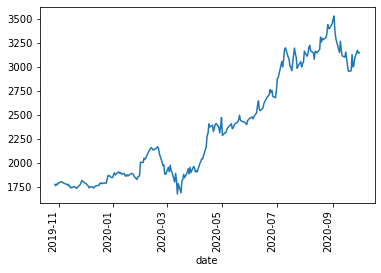

In [13]:
data_df['date'] = pd.to_datetime(data_df['date'])  
    
#greater than the start date and smaller than the end date
mask = (data_df['date'] < new_date) & (data_df['date'] > past)

# On Covid-19 Pandemic
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
amzn=data_df[data_df['security_symbol']=='AMZN']
amzn=amzn.loc[mask]
amzn=amzn.set_index('date')

#yhoo_close=yhoo.close.values.astype('float32')
#yhoo_close.shape
#ax=yhoo['close'].plot('r+')
ax=amzn['close'].plot()
plt.xticks(rotation=90)
amzn.head()

#plt.scatter(yhoo.index, yhoo['close'])

(array([720989., 722815., 724642., 726468., 728294., 730120., 731947.,
        733773., 735599., 737425., 739252.]),
 <a list of 11 Text major ticklabel objects>)

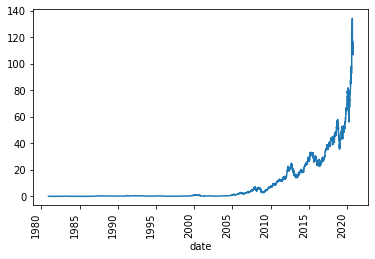

In [14]:
aapl=data_df[data_df['security_symbol']=='AAPL']
aapl=aapl.set_index('date')
ax=aapl['close'].plot()
plt.xticks(rotation=90)

,security_symbol,open,high,low,close,adjusted_close,volume
date,,,,,,,
2019-10-28,AMZN,1748.06,1778.70,1742.50,1777.08,1777.08,3708900
2019-10-29,AMZN,1774.81,1777.00,1755.81,1762.71,1762.71,2276900
2019-10-30,AMZN,1760.24,1782.38,1759.12,1779.99,1779.99,2449400
2019-10-31,AMZN,1775.99,1792.00,1771.48,1776.66,1776.66,2781200
2019-11-01,AMZN,1788.01,1797.45,1785.21,1791.44,1791.44,2790400


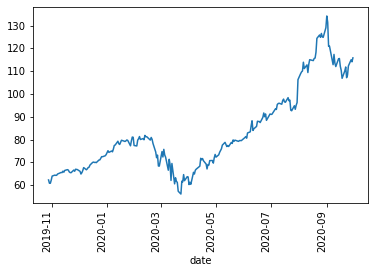

In [15]:
data_df['date'] = pd.to_datetime(data_df['date'])  
    
#greater than the start date and smaller than the end date
mask = (data_df['date'] < new_date) & (data_df['date'] > past)

# On Covid-19 Pandemic
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
aapl=data_df[data_df['security_symbol']=='AAPL']
aapl=aapl.loc[mask]
aapl=aapl.set_index('date')

#yhoo_close=yhoo.close.values.astype('float32')
#yhoo_close.shape
#ax=yhoo['close'].plot('r+')
ax=aapl['close'].plot()
plt.xticks(rotation=90)
amzn.head()

#plt.scatter(yhoo.index, yhoo['close'])

# 2 Moving Average for Each Stocks

Let's move out to a new section: moving average. Moving average is a tool (often used in stock analysis) to make the curve smooth by using method of updating average price. The interval used for moving average can be 10 minutes, 20 minutes, 10 days, 45 weeks, or anything depending to the trader decision. 

According to https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp, there are some key points of using moving average (MA):

* MA can be used for smoothing the price trends in some interval time that the trader chooses
* MA can be used for identifying the level of support and resistance



10036
9947
10036


Text(0.5, 1.0, 'Yahoo MA 90')

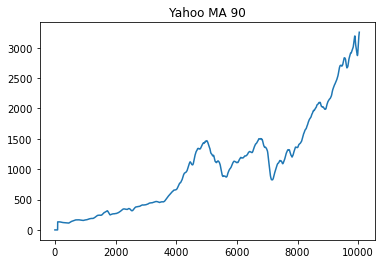

In [16]:
ma_yhoo=[]
window_size = 90
i=0
yhoo=data_df[data_df['security_symbol']=='YHOO']

while i<len(yhoo['close'])-window_size+1:
    this_window=yhoo['close'][i:i+window_size]
    window_average=sum(this_window)/window_size
    ma_yhoo.append(window_average)
    i+=1
print(len(yhoo.close))    
print(len(ma_yhoo))

a=np.empty(90-1).tolist()
#print(len(a))
#a=pd.concat(a,ma_yhoo)

a.extend(ma_yhoo)


print(len(a))

plt.plot(a)
plt.title("Yahoo MA 90")

4058
3969
4058


Text(0.5, 1.0, 'Google MA 90')

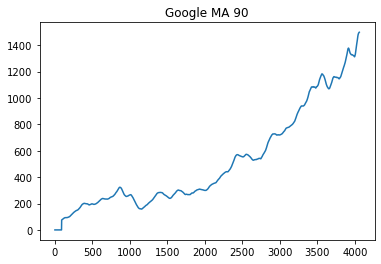

In [17]:
ma_goog=[]
window_size = 90
i=0
goog=data_df[data_df['security_symbol']=='GOOG']

while i<len(goog['close'])-window_size+1:
    this_window=goog['close'][i:i+window_size]
    window_average=sum(this_window)/window_size
    ma_goog.append(window_average)
    i+=1
print(len(goog.close))    
print(len(ma_goog))

a=np.empty(90-1).tolist()
#print(len(a))
#a=pd.concat(a,ma_yhoo)

a.extend(ma_goog)


print(len(a))

plt.plot(a)
plt.title("Google MA 90")

5884
5795
5884


Text(0.5, 1.0, 'Amazon MA 90')

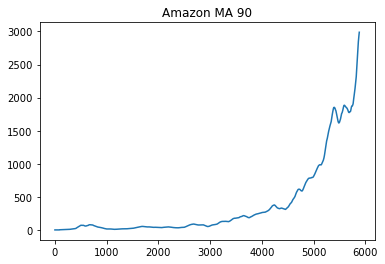

In [18]:
ma_amzn=[]
window_size = 90
i=0
amzn=data_df[data_df['security_symbol']=='AMZN']

while i<len(amzn['close'])-window_size+1:
    this_window=amzn['close'][i:i+window_size]
    window_average=sum(this_window)/window_size
    ma_amzn.append(window_average)
    i+=1
print(len(amzn.close))    
print(len(ma_amzn))

a=np.empty(90-1).tolist()
#print(len(a))
#a=pd.concat(a,ma_yhoo)

a.extend(ma_amzn)


print(len(a))

plt.plot(a)
plt.title("Amazon MA 90")

2106


Text(0.5, 1.0, 'FB MA 90')

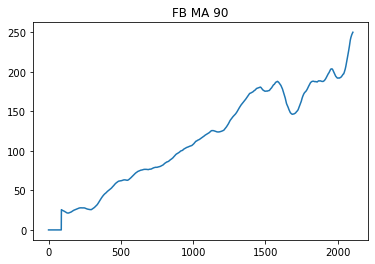

In [19]:
ma_fb=[]
window_size = 90
i=0
fb=data_df[data_df['security_symbol']=='FB']

while i<len(fb['close'])-window_size+1:
    this_window=fb['close'][i:i+window_size]
    window_average=sum(this_window)/window_size
    ma_fb.append(window_average)
    i+=1


a=np.empty(90-1).tolist()
#print(len(a))
#a=pd.concat(a,ma_yhoo)

a.extend(ma_fb)


print(len(a))

plt.plot(a)
plt.title("FB MA 90")

10035


Text(0.5, 1.0, 'AAPL MA 90')

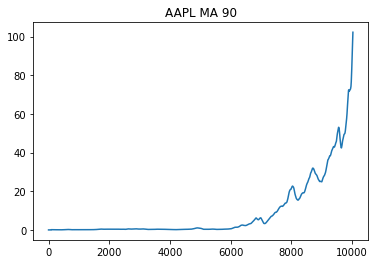

In [20]:
ma_aapl=[]
window_size = 90
i=0
aapl=data_df[data_df['security_symbol']=='AAPL']

while i<len(aapl['close'])-window_size+1:
    this_window=aapl['close'][i:i+window_size]
    window_average=sum(this_window)/window_size
    ma_aapl.append(window_average)
    i+=1


a=np.empty(90-1).tolist()
#print(len(a))
#a=pd.concat(a,ma_yhoo)

a.extend(ma_aapl)


print(len(a))

plt.plot(a)
plt.title("AAPL MA 90")

# will be updated.